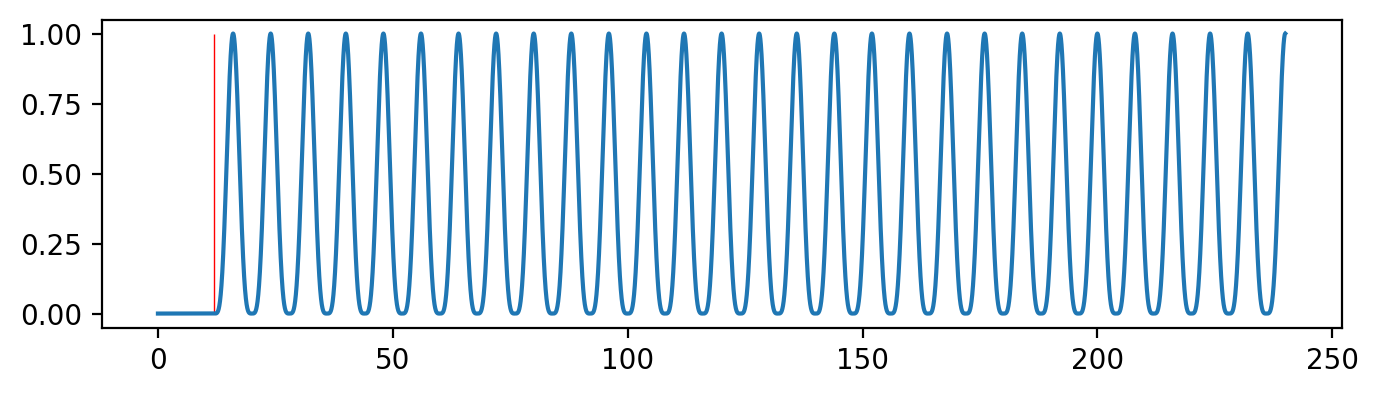

In [1]:
import numpy as np
import matplotlib.pyplot as plt

stim_off = 0.2 * 60 # 0.2 min (12 s)
stim_on = 3.8 * 60 # 3.8 min (228 s)
sample_rate = .01
f=.125
amplitude = 1.

stim_off_samples = stim_off/sample_rate
assert stim_off_samples - int(stim_off_samples) == 0

stim_off_start = np.zeros((int(stim_off_samples),))

stim_time_on = np.arange(0,stim_on,sample_rate)
delay = stim_off - sample_rate * stim_off_samples # seconds


stim_time_on = np.arange(0,stim_on,sample_rate)
stim_tr_offset = 2 * f * np.pi * delay
stim_offset = np.pi / 2 # Periodic stimulus begins at 0
stim_on_2 = amplitude * np.sin( 2 * np.pi * f * stim_time_on - stim_offset - stim_tr_offset ) + amplitude
stim_on_2[0] = 0

stim_signal = np.concatenate((stim_off_start,stim_on_2))
stim_signal = stim_signal**2
stim_signal /= stim_signal.max()
#stim_signal *= 255
stim_time = np.arange(0,stim_off+stim_on,sample_rate)
assert stim_signal.shape == stim_time.shape

fig, ax = plt.subplots(dpi = 200, figsize=(8,2))
ax.plot(stim_time,stim_signal,zorder=2)
ax.vlines(x=stim_off,ymin=0,ymax=stim_signal.max(),color='r',lw=.5,zorder=1)

Save stimulus file

In [7]:
from pathlib import Path

path = Path(f"arduino_stimulus_pilot.txt")
with open(path, "w") as _f:
    for t,a in zip(stim_time,stim_signal):
        _f.write(f"analogWrite(greenpin,{a});\n")
        _f.write(f"delay({sample_rate});\n")

Iterate over stimulus

In [5]:
for t,a in zip(stim_time,stim_signal):
    print(f"t={t:.2f}, intensity: {a:.5f}, wait {sample_rate} s")

t=0.00, intensity: 0.00000, wait 0.01 s
t=0.01, intensity: 0.00000, wait 0.01 s
t=0.02, intensity: 0.00000, wait 0.01 s
t=0.03, intensity: 0.00000, wait 0.01 s
t=0.04, intensity: 0.00000, wait 0.01 s
t=0.05, intensity: 0.00000, wait 0.01 s
t=0.06, intensity: 0.00000, wait 0.01 s
t=0.07, intensity: 0.00000, wait 0.01 s
t=0.08, intensity: 0.00000, wait 0.01 s
t=0.09, intensity: 0.00000, wait 0.01 s
t=0.10, intensity: 0.00000, wait 0.01 s
t=0.11, intensity: 0.00000, wait 0.01 s
t=0.12, intensity: 0.00000, wait 0.01 s
t=0.13, intensity: 0.00000, wait 0.01 s
t=0.14, intensity: 0.00000, wait 0.01 s
t=0.15, intensity: 0.00000, wait 0.01 s
t=0.16, intensity: 0.00000, wait 0.01 s
t=0.17, intensity: 0.00000, wait 0.01 s
t=0.18, intensity: 0.00000, wait 0.01 s
t=0.19, intensity: 0.00000, wait 0.01 s
t=0.20, intensity: 0.00000, wait 0.01 s
t=0.21, intensity: 0.00000, wait 0.01 s
t=0.22, intensity: 0.00000, wait 0.01 s
t=0.23, intensity: 0.00000, wait 0.01 s
t=0.24, intensity: 0.00000, wait 0.01 s
